<h1>Sandra Field </h1>
MSDS 432, Dr Ali <br>
Spring 2021
<h2>Dijkstra's Shortest Path vs. Breadth-First</h2>

In [214]:
import numpy as np
import pandas as pd
import time
from time import perf_counter, perf_counter_ns
from collections import deque

#Graphics
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
sns.set_style('white')
#style.use('seaborn-poster')
from IPython.display import HTML

#Network graphing
import networkx
import networkx as nx
from networkx.generators.community import random_partition_graph
from networkx.generators.random_graphs import erdos_renyi_graph
import plotly.graph_objects as go

graph = networkx.Graph()
#G = nx.random_geometric_graph(200, 0.125)
#random_partition_graph


<h1>Goal: Find shortest path from NYC to LA </h1>
<img src="RoadTrip_NYC_to_L.A.jpg">

<h1>Construct Nodes and Edges of Graph</h1>

In [33]:
G = nx.Graph()
G.add_nodes_from(['NYC', 'DC', 'Atlanta', 'New Orleans', 'Dallas','Albuquerque',\
                  'Phoenix','Las Vegas','Cincinnati','Los Angeles','Indianapolis',\
                  'Kansas City', 'Denver','Salt Lake City', 'Pittsburg',\
                  'San Diego', 'St Louis', 'Oklahoma City'])

In [34]:

G.add_edge('NYC','DC',weight=2)
G.add_edge('NYC','Indianapolis',weight=11)
G.add_edge('NYC','Pittsburg',weight=7)
G.add_edge('DC','Atlanta',weight=2)
G.add_edge('Atlanta','New Orleans',weight=2)
G.add_edge('New Orleans','Dallas',weight=2)
G.add_edge('Kansas City','Denver',weight=7)
G.add_edge('Denver','Salt Lake City',weight=6)
G.add_edge('Salt Lake City','Las Vegas',weight=9)
G.add_edge('Pittsburg','Cincinnati',weight=6)
G.add_edge('Dallas','Albuquerque',weight=2)
G.add_edge('Albuquerque','Phoenix',weight=2)
G.add_edge('Phoenix','Las Vegas',weight=2)
G.add_edge('Indianapolis','Kansas City',weight=8)
G.add_edge('Cincinnati','St Louis',weight=8)
G.add_edge('St Louis','Oklahoma City',weight=7)
G.add_edge('Oklahoma City','Albuquerque',weight=9)
G.add_edge('Phoenix','San Diego',weight=5)
G.add_edge('Las Vegas','San Diego',weight=2)
G.add_edge('Las Vegas','Los Angeles',weight=5)
G.add_edge('San Diego','Los Angeles',weight=2)

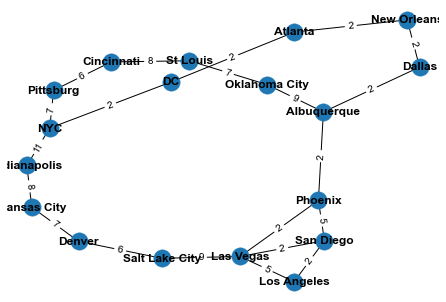

In [215]:
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

<h1>Breadth First Search - Shortest Path <br>
    From LA to NYC </h1>

In [133]:
#nx.shortest_path_length(G,source='NYC', target='Los Angeles')
bpath = nx.shortest_path(G,source='NYC', target='Los Angeles') #weight=None)
print("BFS Shortest Path Nodes: ",\
      len(bpath), \
      "\n\nNodes:\n\n", bpath)

BFS Shortest Path Nodes:  7 

Nodes:

 ['NYC', 'Indianapolis', 'Kansas City', 'Denver', 'Salt Lake City', 'Las Vegas', 'Los Angeles']


In [145]:
#nx.get_edge_attributes(G,'weight')
def pathcost(pathx):
    pathways = [pathx[i: i + 2] for i in range(len(pathx)-1)] 
    totalcost = []
    for pathway in pathways:
        totalcost.append([pathway[0],pathway[1],G[pathway[0]][pathway[1]]['weight']])
    total_distance = 0
    for path in totalcost:

       # print(' --> '.join(path[0:2]) + "; Distance " + str(path[2:][0]))
        total_distance +=path[2:][0]

        
    print("\nDistance Travelled: ", total_distance)
    return total_distance

In [195]:
bcost=pathcost(bpath)


Distance Travelled:  46


<h1>Dijkstra's Algorithm</h1>

In [147]:
dpath = nx.dijkstra_path(G, source='NYC', target='Los Angeles')

In [148]:
print("Dijkstra's Total Nodes: ",\
      len(dpath), \
      "\n\nNodes:\n\n", dpath)

Dijkstra's Total Nodes:  10 

Nodes:

 ['NYC', 'DC', 'Atlanta', 'New Orleans', 'Dallas', 'Albuquerque', 'Phoenix', 'Las Vegas', 'San Diego', 'Los Angeles']


In [197]:

dcost=pathcost(dpath)


Distance Travelled:  18


<h1>Results</h1>

In [205]:
bnodes=len(bpath)
dnodes=len(dpath)


In [206]:
# Create the output metrics DataFrame
results = pd.DataFrame(columns = ['Method', 'Nodes', 'Total Cost'])

results.loc[0] = ['BFS', bnodes, bcost]
results.loc[1] = ['Dijkstra', dnodes, dcost]

In [207]:
results

,Method,Nodes,Total Cost
0,BFS,7,46
1,Dijkstra,10,18


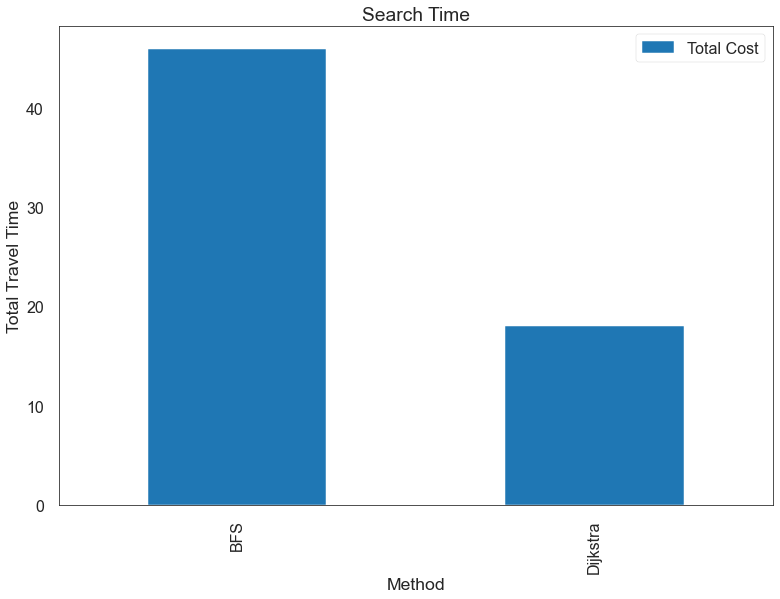

In [219]:
style.use('seaborn-poster')
results.plot.bar(x='Method', y='Total Cost', align='center')
plt.ylabel('Total Travel Time')
plt.title('Search Time')
plt.show()

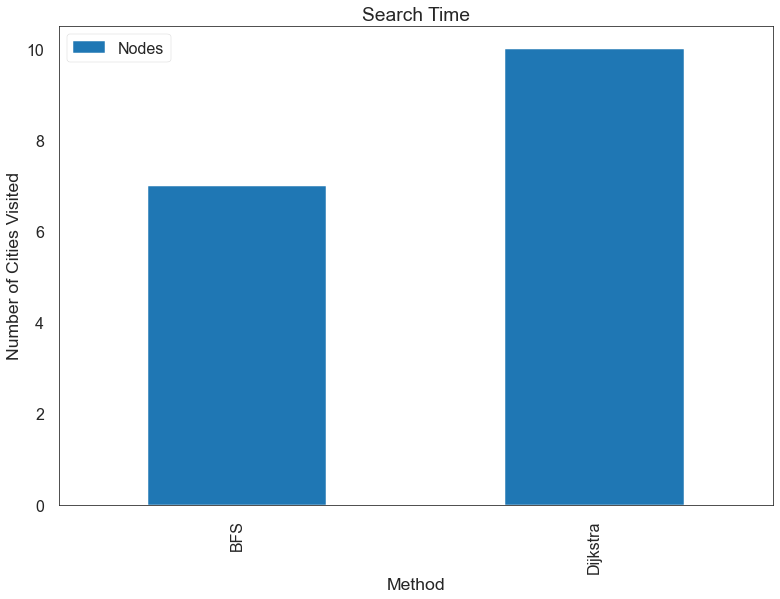

In [220]:
results.plot.bar(x='Method', y='Nodes', align='center')
plt.ylabel('Number of Cities Visited')
plt.title('Search Time')

plt.show()

<h1>Summary</h1><br>

We were able to cut the travel time 40% by using Dijkstra's Algorithm instead of Breadth-First Search (BFS).  The reason is because Dijkstra's algorithm uses a queue for storing and querying partial solutions sorted by distance from the start. It runs in time <b>O(V + E) log V </b>.  Dijkstra follows the shortest local path, and ultimately ends up at the global destination with an optimized minimal distance travelled.<br><br>


A breadth-first search (BFS) requires: <br> 

--Searching entire network which means following each edge (or each arrow, or connection from one node/person to another). So the running time is at least O(number of edges)<br><br>
--Adding one person to the queue takes O(1) time when the person is found, and doing this for each person takes O(number of people). <br><br>
Ultimately, This search searches width before depth, so we expect BFS to take Breadth-first search takes O(number of people) + O(number of edges) or <b> O(V+E)</b>, where <b>V=vertices, E=edges</b>.  <br><br>


<h3>References</h3><br>
1. Bhargava, A. Y. (2016.) <i>Grokking Algorithms: An Illustrated Guide for Programmers and Other Curious People.</i> Shelter Island, N.Y.: Manning.<br><br>
                    